In [4]:
# !pip install gensim
# !pip install sklearn
# !pip install matplotlib

In [1]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
%matplotlib notebook
from matplotlib import pyplot

import numpy as np
import pandas as pd

In [2]:
model = api.load("glove-wiki-gigaword-300")

In [25]:
print(model.most_similar(positive=['apple'],
                         topn=3))

[('iphone', 0.5987043380737305), ('macintosh', 0.5836331248283386), ('ipod', 0.5761123895645142)]


In [26]:
print(model.most_similar(positive=['apple'],
                         negative=['technology'],
                         topn=10))

[('pies', 0.44060254096984863), ('peach', 0.4242527484893799), ('pear', 0.42015740275382996), ('cherry', 0.4092121124267578), ('mango', 0.39178839325904846), ('tart', 0.39138612151145935), ('pecan', 0.38823866844177246), ('apples', 0.37616100907325745), ('strawberry', 0.37469568848609924), ('laserwriter', 0.3736179769039154)]


In [15]:
print(model.most_similar(positive=['japan', 'tartare'],
                     negative=['america'],
                     topn=1))
print(model.most_similar(positive=['korea', 'sauerkraut'],
                     negative=['germany'],
                     topn=1))
print(model.most_similar(positive=['italy', 'vermicelli'],
                     negative=['vietnam'],
                     topn=1))
print(model.most_similar(positive=['russia', 'cognac'],
                     negative=['france'],
                     topn=1))

[('sashimi', 0.549740731716156)]
[('vodka', 0.5875515937805176)]
[('kimchi', 0.5781849026679993)]
[('pasta', 0.4332351088523865)]


In [27]:
print(model.most_similar(positive=['steak'],
                         negative=['fat'],
                         topn=1))

print(model.most_similar(positive=['sashimi', 'rice'],
                         topn=10))

[('sirloin', 0.40915200114250183)]
[('sushi', 0.63324373960495), ('vegetables', 0.5503180027008057), ('noodles', 0.5337184071540833), ('tuna', 0.5080768465995789), ('beans', 0.49327412247657776), ('grilled', 0.4827726185321808), ('tempura', 0.48109540343284607), ('seafood', 0.47444766759872437), ('basmati', 0.473812073469162), ('cooked', 0.46671798825263977)]


In [17]:
topn = 17
target = 'flatbread'

In [18]:
topn_words = model.similar_by_word(target,
                                   topn=topn)

In [19]:
print(topn_words)

[('focaccia', 0.6069138646125793), ('pita', 0.5260070562362671), ('roti', 0.5246891379356384), ('flatbreads', 0.5245964527130127), ('lavash', 0.512840986251831), ('paratha', 0.5010882019996643), ('unleavened', 0.49699637293815613), ('breads', 0.490377813577652), ('chapati', 0.4852648079395294), ('ciabatta', 0.4851876199245453), ('tortillas', 0.48401400446891785), ('porridge', 0.4767778813838959), ('breaded', 0.47519171237945557), ('hummus', 0.4743904769420624), ('pastries', 0.47403886914253235), ('quesadillas', 0.47388091683387756), ('tacos', 0.47284477949142456)]


In [20]:
# consolidate word vectors
wordvecs = pd.DataFrame()
words = []
for i in range(topn):
    
    # get word
    word = topn_words[i][0]
    words = words + [str(word)]
    
    # get word vector
    wordvec = pd.Series(model[word])
    wordvecs = pd.concat([wordvecs,
                         wordvec],
                         axis = 1)
wordvecs = wordvecs.T
print(len(words))
print(wordvecs.shape)

17
(17, 300)


In [21]:
# reduce dimensions using PCA
pca = PCA(n_components=2)
pca_vecs = pca.fit_transform(wordvecs)

<IPython.core.display.Javascript object>


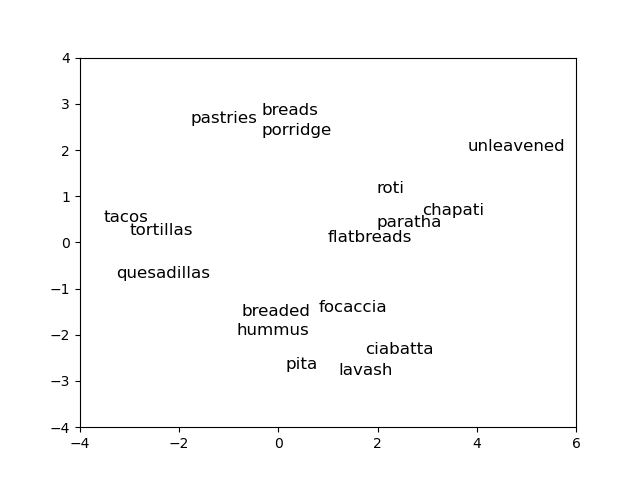

In [22]:
# create a word scatter plot
pyplot.scatter(x = pca_vecs[:,0],
               y = pca_vecs[:,1],
               s=0)
for i, word in enumerate(words):
    pyplot.annotate(word,
                    xy=(pca_vecs[i,0],
                        pca_vecs[i,1]),
                    xytext=(pca_vecs[i,0]+.1,
                            pca_vecs[i,1]-.1),
                    fontsize=12)
    pyplot.xlim(left=-4,
                right=6)
    pyplot.ylim(top=4,
                bottom=-4)
pyplot.show()